This first section is devoted to Birth and Death Processes. 
They are discrete state, continuous time markov chains. 

The class below encompasses some special cases of the birth and death process, such as the Poisson, or the Yule process for instance. The functions towards the bottom are there to generate sojourn times between states, so as to be able to plot these processes over a "continuous" interval of time.

The below markov chains are all finite. 

The Yule Process as well as the Linear Birth and Death Process, must start from state 1, since you would need at least one instance to trigger the linear births in the process followingly. 

Otherwise, the state spaces start from 0. 

In [85]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib notebook

In [16]:
class Birth_Death():
    """
    A Birth Death motion class constructor, no absorbing states, and finite
    """
    def __init__(self ,num_iterations, statespace, func, lambda_i, mu_i):

        assert (type(num_iterations)==int)
        assert (type(statespace)==int)
        assert (type(func) == str)

        self.num_iterations = num_iterations
        self.statespace = statespace
        self.func = func
        self.rates = []
        self.waiting_time = 0
        self.timeline = 0
        self.mu_i = mu_i
        self.lambda_i = lambda_i
        self.next_state = 0
        self.arrivals = []
        self.points = []
    
    #linear birth and death, a combination of the yule process and linear death, with no absorbant states
    def Linear(self):
        if self.next_state == 1:
            return [self.lambda_i*self.next_state, 0]
        if self.next_state == self.statespace - 1:
            return [0, self.mu_i * self.next_state]

        return [self.lambda_i*self.next_state, self.mu_i * self.next_state]
    
    #Poisson Process, a special case of birth death where mu_i = 0, and lambda_i = lambda, for all i
    def Poisson(self):
        return [self.lambda_i, 0]
    
    #linear death, a special case of birth death where mu_i = i*mu, and lambda_i = 0, for all i
    def Linear_death(self):
        return [0, self.mu_i * self.next_state]
    
    #Yule process, a special case of birth death where mu_i = 0, and lambda_i = i*lambda, for all i
    def Yule(self):
        return [self.lambda_i*self.next_state, 0]

In [91]:
a = [5]*10
a = Counter(a)
len(a)

1

In [173]:
def liveplot(*objects):
    
    #assert( alll object lenghts equal each other)
    
    plot_name = []

    for obj in objects:
        f = getattr(obj, obj.func) 
        if f.__name__ == "Yule":
            plot_name.append("Yule, $\lambda_k$ = " + str(obj.lambda_i) + "\u03BA")
            obj.next_state = 1
        elif f.__name__ == "Linear":
            plot_name.append("Linear Birth/Death, $\lambda_k$ = " + str(obj.lambda_i) + "\u03BA" + ", \u03BC_k = " + str(obj.mu_i) + "\u03BA")
            obj.next_state = 1
        elif f.__name__ == "Poisson":
            plot_name.append("Poisson, $\lambda$ = " + str(obj.lambda_i))
            obj.next_state = 0
        else:
            plot_name.append("Linear Death, \u03BC_k = " + str(obj.mu_i) + "\u03BA")
            obj.next_state = obj.statespace
            
    
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()
    
    #generate unique color for each processes plot
    colors = "bgrcmykw"
    
    for j in range(objects[0].num_iterations): 
        
        #determine the paramters for the current state
        for obj in objects:
            
            x = getattr(obj, obj.func)

            obj.rates = x()

            obj.waiting_times = np.random.exponential(sum(obj.rates))

            obj.timeline += obj.waiting_times

            current_lambda_i = obj.rates[0]
            current_mu_i = obj.rates[1]
            
            #setting absorbant state for linear death
            if sum(obj.rates) == 0: 
                obj.next_state = 0
            else:
                obj.next_state = float(choice([obj.next_state+1, obj.next_state - 1], p=(current_lambda_i/sum(obj.rates), current_mu_i/sum(obj.rates))))

        for x in range(len(objects)):
            objects[x].arrivals.append(objects[x].timeline)
            objects[x].points.append(objects[x].next_state)
            # clunky condition to only assign the labels once
            if j == 0:
                ax.plot(objects[x].arrivals, objects[x].points, color = colors[x], label=plot_name[x])
            else:
                ax.plot(objects[x].arrivals, objects[x].points, color = colors[x])
        plt.pause(0.0001)
        fig.canvas.draw()
        ax.legend()
        


In [174]:
b = Birth_Death(100**2, 50, "Linear",.05,.05)
a = Birth_Death(100**2, 50, "Linear", .05, .07)

In [ ]:
#This cell will display the processes called from liveplot
liveplot(a,b)

<IPython.core.display.Javascript object>


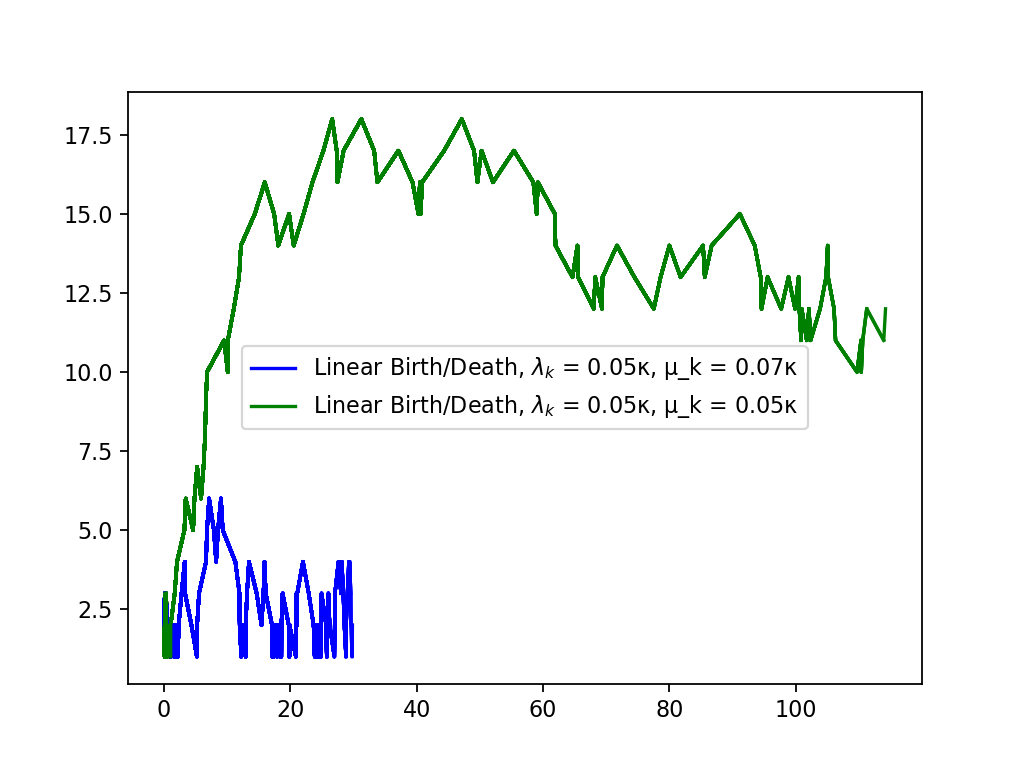

In [175]:
fig = plt.figure()